<a href="https://colab.research.google.com/github/LangAbhinav/docs/blob/main/song6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import zipfile
file_path = '/content/drive/MyDrive/dataset/song/song.zip'
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall()



In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string
import numpy as np


In [ ]:
import nltk
import string
def tokenize_new(new, num_words=-1):
  if num_words > -1:
    tokenizer = Tokenizer(num_words=num_words)
  else:
    tokenizer = Tokenizer()
  tokenizer.fit_on_texts(new)
  return tokenizer

def create_lyrics_new(df, text):
  # Remove all other punctuation
  df[text] = df[text].str.replace('[{}]'.format(string.punctuation), '')
  # Make it lowercase
  df[text] = df[text].str.lower()
  # Make it one long string to split by line
  lyrics = df[text].str.cat()
  new = lyrics.split('\n')
  # Remove any trailing whitespace
  for l in range(len(new)):
    new[l] = new[l].rstrip()
  # Remove any empty lines
  new = [l for l in new if l != '']

  return new


In [ ]:
df = pd.read_csv(file_path, encoding="ISO-8859-1", dtype=str)[:10]
new = create_lyrics_new(df, 'lyric')
# Tokenize the corpus
tokenizer = tokenize_new(new)

total_words = len(tokenizer.word_index) + 1
print(tokenizer.word_index)
print(total_words)

{'a': 1, 'said': 2, 'the': 3, 'my': 4, 'to': 5, 'that': 6, 'summer': 7, 'you': 8, 'think': 9, 'he': 10, 'way': 11, 'blue': 12, 'eyes': 13, 'shinedput': 14, 'those': 15, 'georgia': 16, 'stars': 17, 'shame': 18, 'nighti': 19, 'thats': 20, 'liejust': 21, 'boy': 22, 'in': 23, 'chevy': 24, 'truckthat': 25, 'had': 26, 'tendency': 27, 'of': 28, 'gettin': 29, 'stuckon': 30, 'backroads': 31, 'at': 32, 'nightand': 33, 'i': 34, 'was': 35, 'right': 36, 'there': 37, 'beside': 38, 'him': 39, 'all': 40, 'longand': 41, 'then': 42, 'time': 43, 'we': 44, 'woke': 45, 'up': 46, 'find': 47, 'gonebut': 48, 'when': 49, 'tim': 50, 'mcgrawi': 51, 'hope': 52, 'favorite': 53, 'song': 54}
55


<ipython-input-11-f5af19287d58>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text] = df[text].str.replace('[{}]'.format(string.punctuation), '')


In [ ]:
sequences = []
for line in new:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		sequences.append(n_gram_sequence)

# Pad sequences for equal input length
max_sequence_len = max([len(seq) for seq in sequences])
sequences = np.array(pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))

# Split sequences between the "input" sequence and "output" predicted word
input_sequences, labels = sequences[:,:-1], sequences[:,-1]
# One-hot encode the labels
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(input_sequences, one_hot_labels, epochs=200, verbose=1)

Epoch 1/200
2/2 [==============================] - 2s 26ms/step - loss: 4.0096 - accuracy: 0.0156
Epoch 2/200
2/2 [==============================] - 0s 22ms/step - loss: 4.0047 - accuracy: 0.0156
Epoch 3/200
2/2 [==============================] - 0s 22ms/step - loss: 4.0003 - accuracy: 0.0469
Epoch 4/200
2/2 [==============================] - 0s 33ms/step - loss: 3.9964 - accuracy: 0.0938
Epoch 5/200
2/2 [==============================] - 0s 25ms/step - loss: 3.9925 - accuracy: 0.0938
Epoch 6/200
2/2 [==============================] - 0s 26ms/step - loss: 3.9886 - accuracy: 0.0938
Epoch 7/200
2/2 [==============================] - 0s 22ms/step - loss: 3.9844 - accuracy: 0.0938
Epoch 8/200
2/2 [==============================] - 0s 24ms/step - loss: 3.9799 - accuracy: 0.0938
Epoch 9/200
2/2 [==============================] - 0s 23ms/step - loss: 3.9749 - accuracy: 0.1094
Epoch 10/200
2/2 [==============================] - 0s 24ms/step - loss: 3.9698 - accuracy: 0.1094
Epoch 11/200
2/2 [=

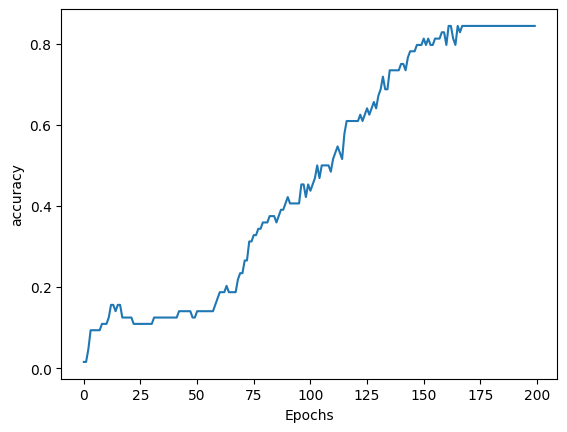

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [ ]:
seed_text = "im feeling chills"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 16ms/step
im feeling chills said said the my the my those those georgia stars to shame that said said a a a a a a a truckthat had a tendency gettin gettin stuckon backroads at nightand i was right there beside there beside all summer longand then the time we woke up to find that summer gonebut when you you think tim mcgrawi hope you think my favorite song song song song song song song song song song favorite song song song song song song song song song song song song song mcgrawi then liejust mcgrawi hope favorite song think mcgrawi favorite song song
